In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
messages=pd.read_csv('messages.csv',encoding='latin-1')

In [3]:
messages.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
messages.shape

(2893, 3)

0    2412
1     481
Name: label, dtype: int64


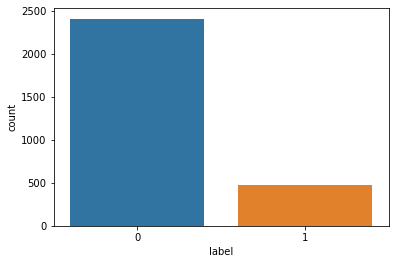

In [5]:
print(messages['label'].value_counts())
sns.countplot(messages['label'])
plt.show()

In [6]:
messages.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
messages['length']=messages.message.str.len()

In [8]:
messages

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,2949


In [9]:
#replace email address with string 'emailaddress'
messages['message']=messages['message'].str.replace(r'^.+@[^\.}.*\.[a-z]{2,}$','emailaddress')

In [10]:
#replace web addresses with string 'webaddress'
messages['message']=messages['message'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
#replace currency symbols with string 'currency'
messages['message']=messages['message'].str.replace(r'₹£€|\$','currency')

In [11]:
#replace phone numbers with string 'phonenumber'
messages['message']=messages['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}\)?[\s-]?[\d]{3}$','phonenumber')

In [12]:
#remove punctuation
messages['message']=messages['message'].str.replace(r'[^\w\d\s]',' ')
#replace whitespace
messages['message']=messages['message'].str.replace(r'\s+',' ')
#remove leading and trailing whitespace
messages['message']=messages['message'].str.replace(r'^\s+|\s+?$',' ')

In [13]:
messages

,subject,message,label,length
0,job posting - apple-iss research center,content length 3386 apple iss research center ...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by we have taken man...,1,262
2889,you have been asked to join kiddin,the list owner of kiddin has invited you to jo...,1,2163
2890,anglicization of composers ' names,judging from the return post i must have sound...,0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha there are two separate fallacies in the...,0,2949


In [14]:
import string
import nltk
from nltk.corpus import stopwords

In [15]:
stop_words=set(stopwords.words('english')+['u','ur','4','2','im','don','doin','r'])
messages['message']=messages['message'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atakle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
messages['clean_length']=messages.message.str.len()
messages

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length 3386 apple iss research center ...,0,2856,2143
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1399
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1024
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks stopping taken many new pics made...,1,262,132
2889,you have been asked to join kiddin,list owner kiddin invited join mailing list li...,1,2163,1206
2890,anglicization of composers ' names,judging return post must sounded like kind sel...,0,1039,643
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha two separate fallacies argument n ary c...,0,2949,1740


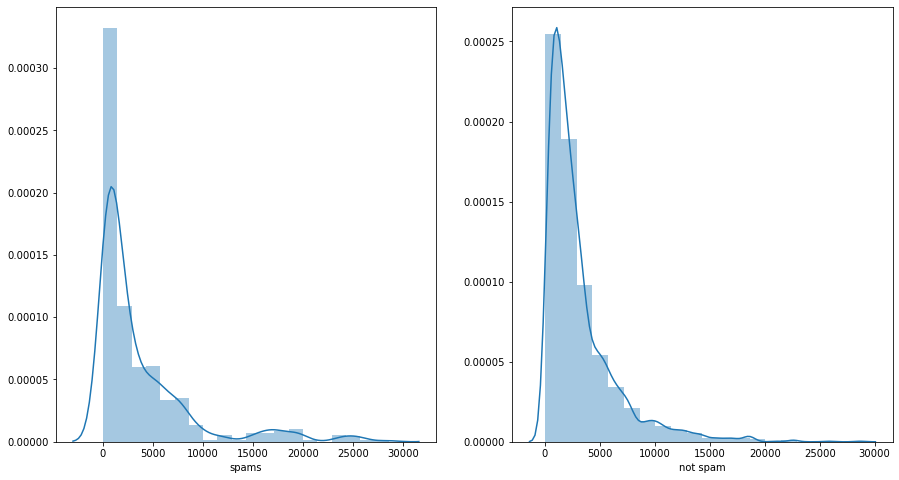

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(messages[messages['label']==1]['length'],bins=20,ax=ax[0])

sns.distplot(messages[messages['label']==0]['length'],bins=20,ax=ax[1])
ax[0].set_xlabel('spams')
ax[1].set_xlabel('not spam')
plt.show()

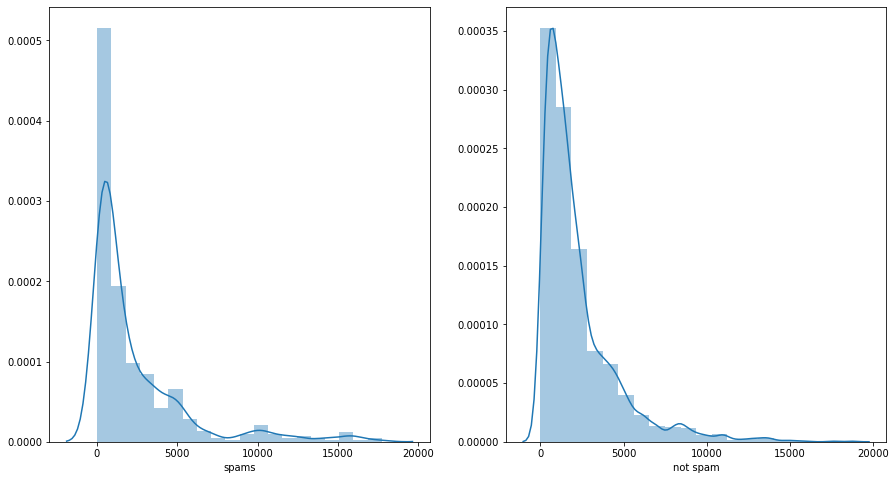

In [19]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(messages[messages['label']==1]['clean_length'],bins=20,ax=ax[0])

sns.distplot(messages[messages['label']==0]['clean_length'],bins=20,ax=ax[1])
ax[0].set_xlabel('spams')
ax[1].set_xlabel('not spam')
plt.show()

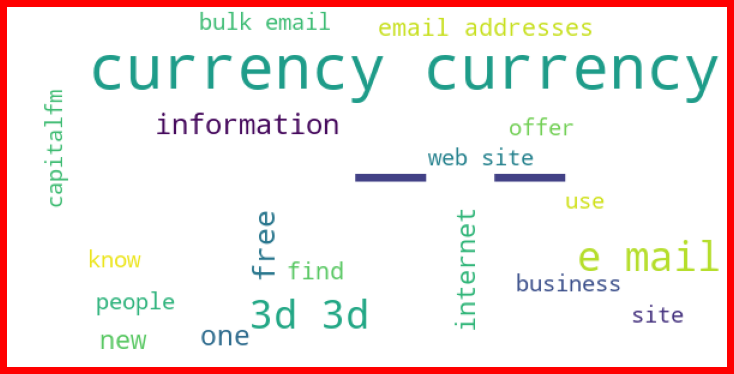

In [20]:
from wordcloud import WordCloud

spams= messages['message'][messages['label']==1]
spam_cloud=WordCloud(width=600,height=300, background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

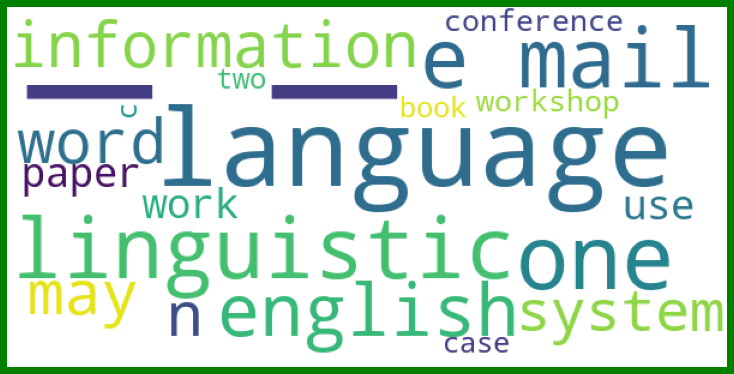

In [21]:
spams= messages['message'][messages['label']==0]
spam_cloud=WordCloud(width=600,height=300, background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
NB=MultinomialNB()

features=tf_vec.fit_transform(messages['message'])

x=features
y=messages['label']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
NB.fit(x_train,y_train)
y_pred_nb=NB.predict(x_test)
print(accuracy_score(y_test,y_pred_nb))

0.8328729281767956


In [24]:
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.13      0.23       139

    accuracy                           0.83       724
   macro avg       0.91      0.56      0.57       724
weighted avg       0.86      0.83      0.78       724

[[585   0]
 [121  18]]


Text(0.5, 0.98, 'Comparision of NB results')

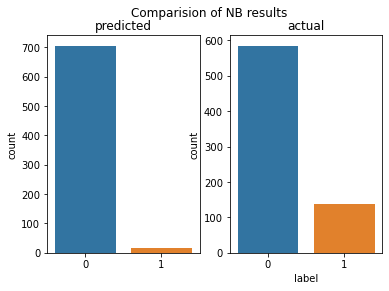

In [25]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_nb)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')
plt.suptitle('Comparision of NB results')


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred_dtc))

0.9433701657458563


In [27]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       585
           1       0.89      0.81      0.85       139

    accuracy                           0.94       724
   macro avg       0.92      0.89      0.91       724
weighted avg       0.94      0.94      0.94       724



In [28]:
print(confusion_matrix(y_test,y_pred_dtc))

[[571  14]
 [ 27 112]]


Text(0.5, 0.98, 'Comparision of DTC results')

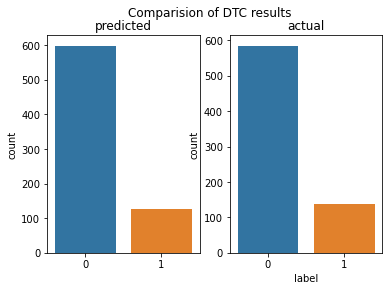

In [29]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_dtc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')
plt.suptitle('Comparision of DTC results')

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred_rfc))

0.9696132596685083


In [31]:
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       585
           1       1.00      0.84      0.91       139

    accuracy                           0.97       724
   macro avg       0.98      0.92      0.95       724
weighted avg       0.97      0.97      0.97       724

[[585   0]
 [ 22 117]]


Text(0.5, 0.98, 'Comparision of RFC results')

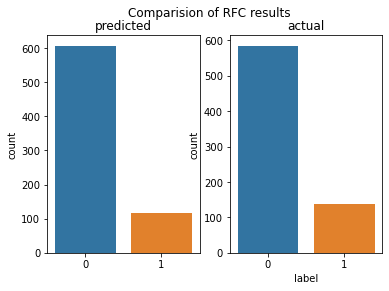

In [32]:
plt.subplot(1, 2, 1)
sns.countplot(y_pred_rfc)
plt.title('predicted')
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('actual')

plt.suptitle('Comparision of RFC results')


In [33]:
import joblib
joblib.dump(rfc,'email.pkl')

['email.pkl']